# Layout Analysis

Beyond simple text and lines, `natural-pdf` can use layout analysis models (like YOLO or DETR) to identify semantic regions within a page, such as paragraphs, tables, figures, headers, etc. This provides a higher-level understanding of the document structure.

## Available Layout Engines

* **yolo** – YOLOv5 model trained on DocLayNet; fast and good at classic page objects (paragraph, table, figure, heading).  Install via `npdf install yolo`.
* **tatr** – Microsoft's Table Transformer (LayoutLM) specialised in tables; already included in the **ai** extra.
* **paddle** – PaddleOCR`s layout detector; lightweight and CPU-friendly.
* **surya** – Surya Layout Parser (DETR backbone) tuned for invoices and forms.
* **docling** – YOLOX model published by DocLING researchers; performs well on historical documents.
* **gemini** – Calls Google's Vision Gemini API (experimental, requires `OPENAI_API_KEY`).

`page.analyze_layout()` defaults to the first available engine (search order `yolo → paddle → tatr`), but you can pick one explicitly with `engine="..."`.

Let's analyze the layout of our `01-practice.pdf`.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load the PDF and get the page
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Analyze the layout using the default model
# This adds 'detected' Region objects to the page
# It returns an ElementCollection of the detected regions
page.analyze_layout()
detected_regions = page.find_all('region[source="detected"]')

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmp40e924an/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 1368.7ms


Speed: 6.0ms preprocess, 1368.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 800)


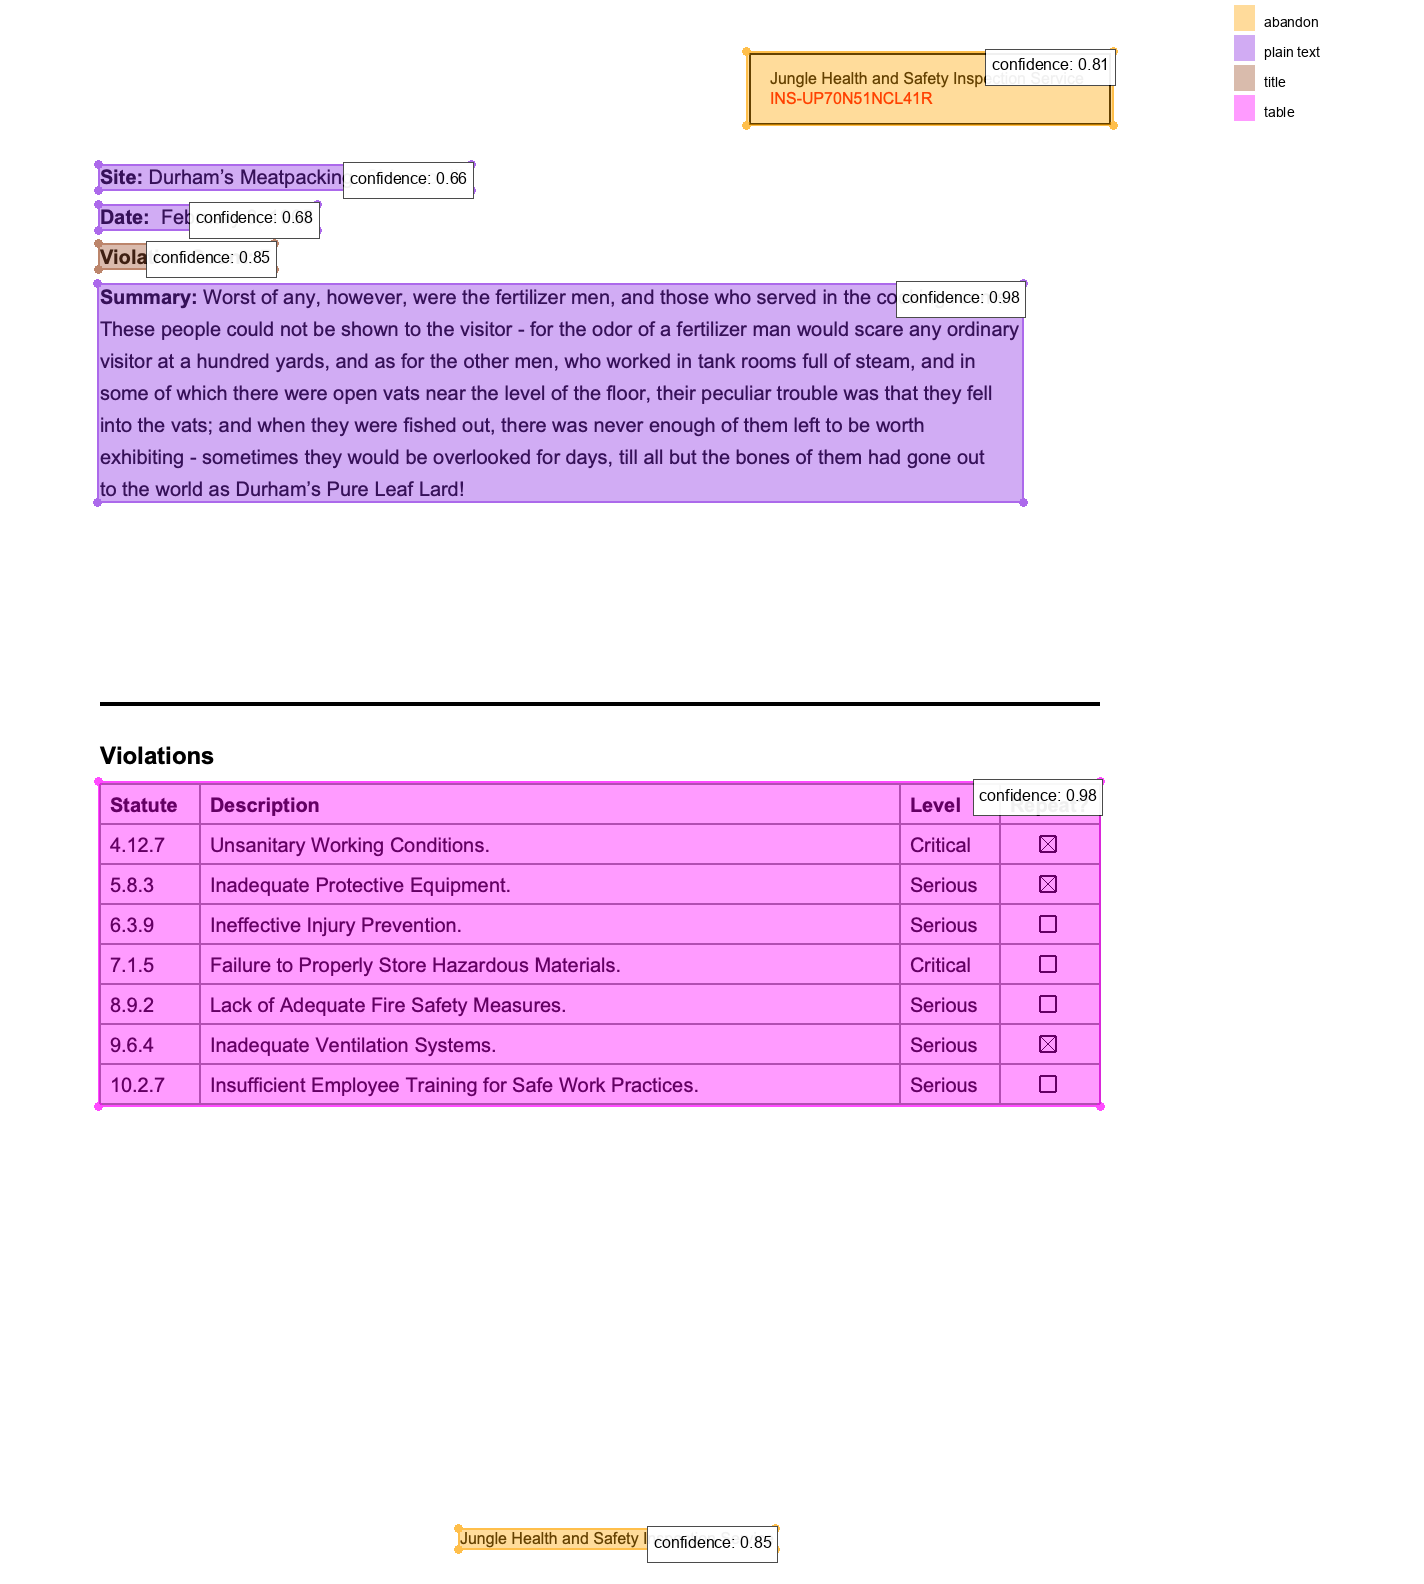

In [3]:
# Visualize all detected regions, using default colors based on type
detected_regions.show(group_by='type', include_attrs=['confidence'])

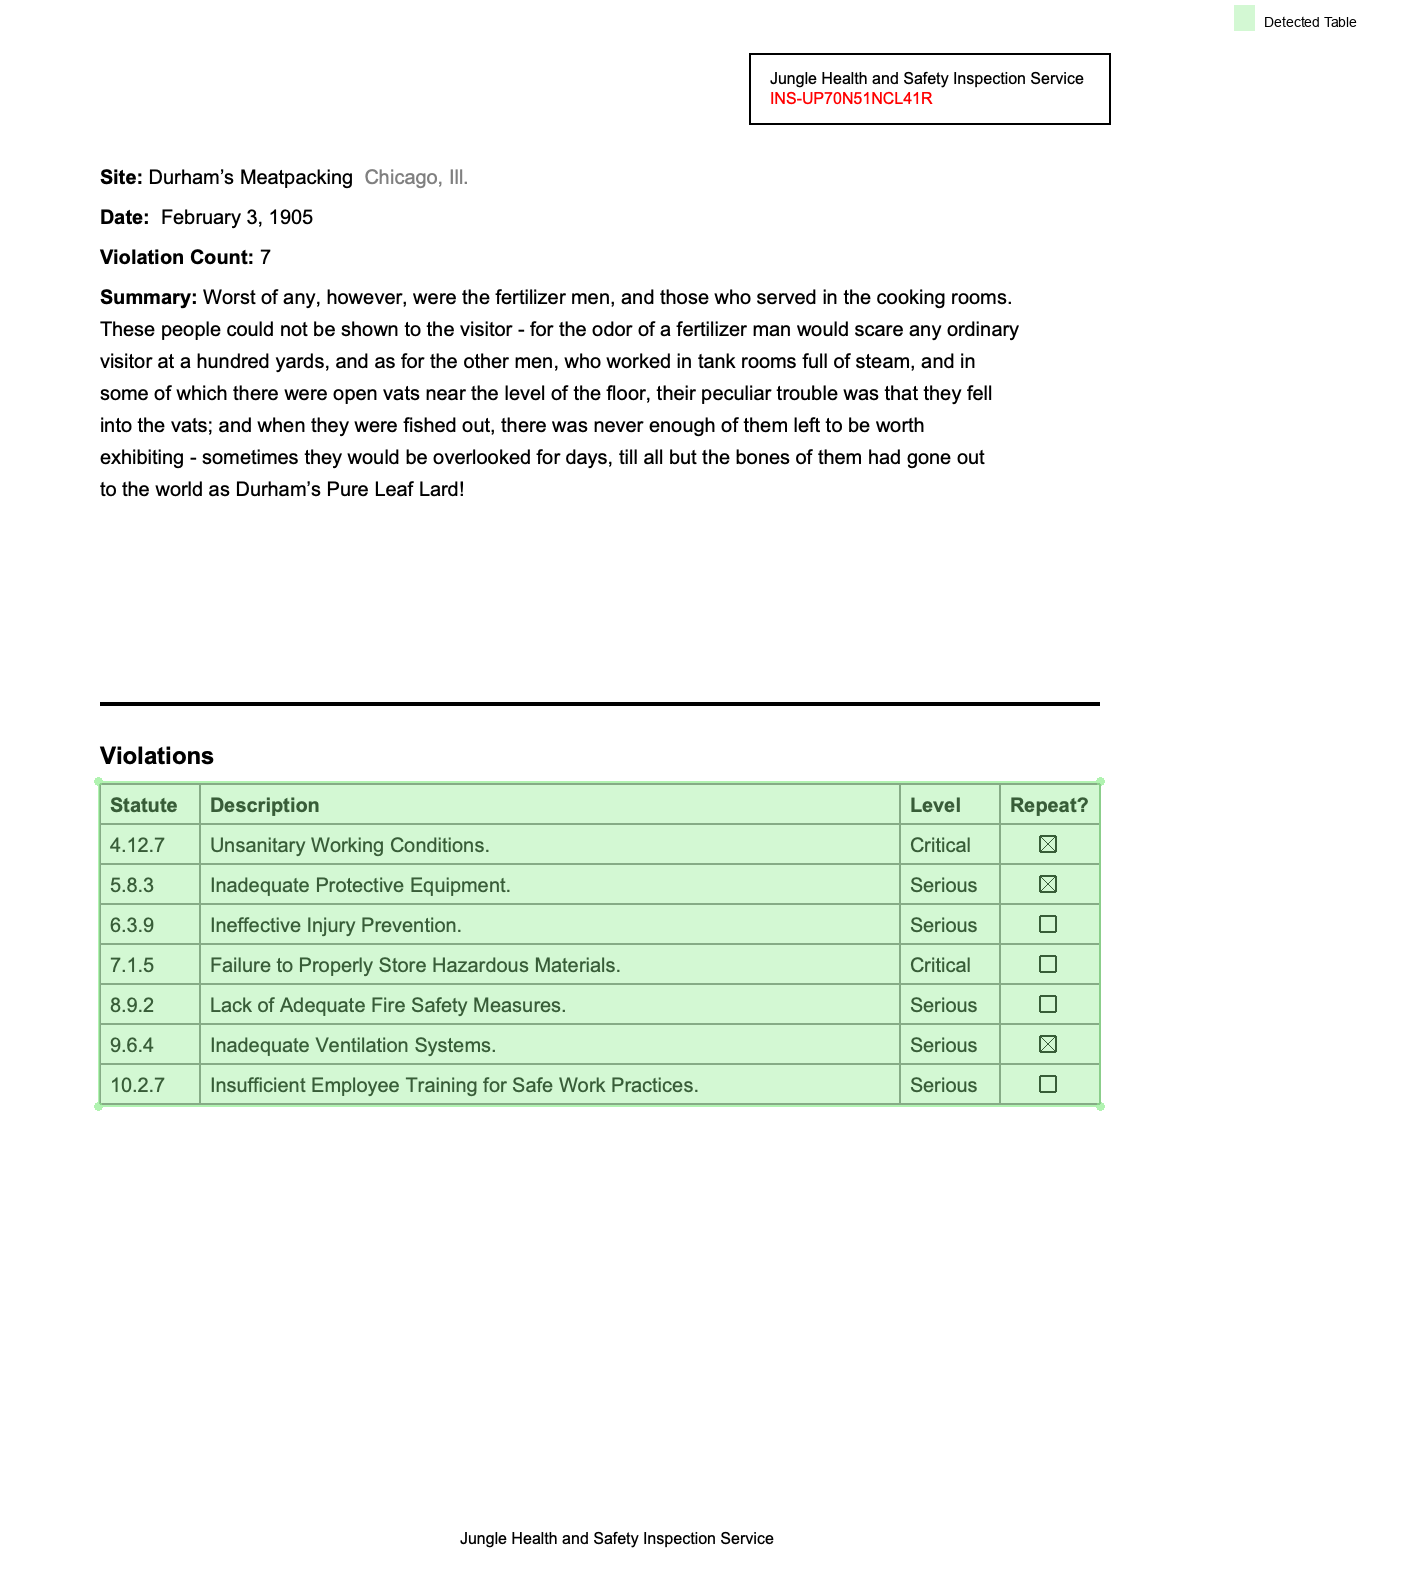

In [4]:
# Find and visualize only the detected table region(s)
tables = page.find_all('region[type=table]')
tables.show(color='lightgreen', label='Detected Table')

In [5]:
# Extract text specifically from the detected table region
table_region = tables.first # Assuming only one table was detected
# Extract text preserving layout
table_text_layout = table_region.extract_text(layout=True)
table_text_layout

'Statute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation Systems. Serious\n10.2.7 Insufficient Employee Training for Safe Work Practices. Serious'

In [6]:
# Layout-detected regions can also be used for table extraction
# This can be more robust than the basic page.extract_tables()
# especially for tables without clear lines.
table_data = table_region.extract_table()
table_data

[['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

## Switching Engines and Tuning Thresholds

In [7]:
# Re-run layout with PaddleOCR detector
page.clear_detected_layout_regions()

paddle_regions = page.analyze_layout(engine="paddle", confidence=0.3)
#paddle_regions.show(group_by="type")

# Only keep detections the model tagged as "table" or "figure"
tables_and_figs = paddle_regions.filter(lambda r: r.normalized_type in {"table", "figure"})
#tables_and_figs.show(label_format="{normalized_type} ({confidence:.2f})")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


/Users/soma/Development/natural-pdf/.nox/tutorials/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Creating model: ('UVDoc', None)


Using official model (UVDoc), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocBlockLayout', None)


Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocLayout_plus-L', None)


Using official model (PP-DocLayout_plus-L), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_table_cls', None)


Using official model (PP-LCNet_x1_0_table_cls), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANeXt_wired', None)


Using official model (SLANeXt_wired), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANet_plus', None)


Using official model (SLANet_plus), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wired_table_cell_det', None)


Using official model (RT-DETR-L_wired_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wireless_table_cell_det', None)


Using official model (RT-DETR-L_wireless_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-Chart2Table', None)


Using official model (PP-Chart2Table), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/config.json


Loading weights file /Users/soma/.paddlex/official_models/PP-Chart2Table/model_state.pdparams


Loaded weights file from disk, setting weights to model.


All model checkpoint weights were used when initializing PPChart2TableInference.



All the weights of PPChart2TableInference were initialized from the model checkpoint at /Users/soma/.paddlex/official_models/PP-Chart2Table.
If your task is similar to the task the model of the checkpoint was trained on, you can already use PPChart2TableInference for predictions without further training.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/generation_config.json


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


The helper accepts these common kwargs (see `LayoutOptions` subclasses for full list):

* `confidence` – minimum score for retaining a prediction.
* `classes` / `exclude_classes` – whitelist or blacklist region types.
* `device` – "cuda" or "cpu"; defaults to GPU if available.

Each engine also exposes its own options class (e.g., `YOLOLayoutOptions`) for fine control over NMS thresholds, model sizes, etc. Pass an instance via the `options=` param.

Layout analysis provides structured `Region` objects. You can filter these regions by their predicted `type` and then perform actions like visualization or extracting text/tables specifically from those regions.

## TODO

* Add a speed/accuracy comparison snippet looping over all installed engines.
* Demonstrate multi-page batch: `pdf.pages[::2].analyze_layout(engine="yolo")`.
* Show `page.get_sections(start_elements=page.find_all('region[type=heading]'))` to split by detected headings.
* Include an example of exporting regions to COCO JSON for custom model fine-tuning.
* Document how to override the model path via `model_name` and how to plug a remote inference client (`client=`).

## Wish List (Future Enhancements)

* **Confidence palette** – Allow `show(color_by="confidence")` to auto-map scores to a red–green gradient.
* **`ElementCollection.to_json()`** – one-liner export of detected regions (and optionally `to_dataframe()`).
* **Model cache override** – honor an env variable like `NATPDF_MODEL_DIR` so enterprises can redirect weight downloads.
* **Remote inference support** – make the `client=` hook forward images to a custom REST or gRPC service.